In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split 
from textblob.classifiers import NaiveBayesClassifier

In [7]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory import os
# Any results you write to the current directory are saved as output.

#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
   #     print(os.path.join(dirname, filename))

### Loading dataset

In [9]:
data = pd.read_csv('amazon_alexa.csv')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Reviewing Metadata

In [12]:
data.shape

(3150, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Removing Data Column

In [14]:
dataset = data.drop('date', axis = 1)
dataset.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


### Converting feedback 0,1 to pos,neg

In [17]:
dataset['feedback'] = np.where(dataset['feedback'].isin([1]), 'pos', 'neg')
dataset.head(3)

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,pos
1,5,Charcoal Fabric,Loved it!,pos
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",pos


## Sentiment Analysis

### Trying in one review

In [18]:
dataset['verified_reviews'][500]

"There's really no dislike for Alexa( dot) I thought cortna was cool but Alexa is an awesome application to the family. Unbelievable device which seems alive. A must get."

In [19]:
text_object = TextBlob(dataset['verified_reviews'][500])
print(text_object.sentiment)

Sentiment(polarity=0.22000000000000003, subjectivity=0.65)


The output shows that the review is positive with a high subjectivity.

### Finding out sentiment polarity and adding it to our dataset

In [21]:
def polarity(review):
    return TextBlob(review).sentiment.polarity

dataset['Sentiment_Polarity'] = dataset['verified_reviews'].apply(polarity)
dataset.head(10)

,rating,variation,verified_reviews,feedback,Sentiment_Polarity
0,5,Charcoal Fabric,Love my Echo!,pos,0.625000
1,5,Charcoal Fabric,Loved it!,pos,0.875000
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",pos,-0.100000
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,pos,0.350000
4,5,Charcoal Fabric,Music,pos,0.000000
5,5,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,pos,0.294643
6,3,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",pos,0.216667
7,5,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,pos,0.200000
8,5,Heather Gray Fabric,looks great,pos,0.800000
9,5,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,pos,0.988281


### Plotting the distribution of polarity

/Users/leslie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

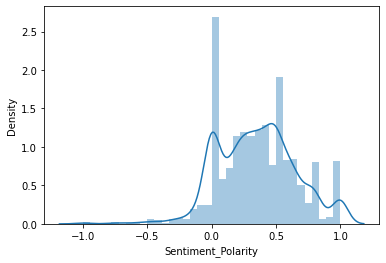

In [22]:
sns.distplot(dataset['Sentiment_Polarity'])

### Plotting the average polarity for each rating

<AxesSubplot:xlabel='rating', ylabel='Sentiment_Polarity'>

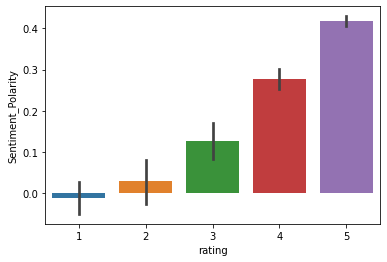

In [24]:
sns.barplot(x='rating', y='Sentiment_Polarity', data=dataset)

The highest the ratings, the highest the positive polarities

### Finding the top 5 most negative reviews and most possitive reviews

In [29]:
#most negative
most_negative = dataset[dataset.Sentiment_Polarity == -1].verified_reviews.head()
print(most_negative)

661     This Echo Dot is horrible. The volume on my ph...
1340    Get rid of the &#34;Thongs To Try&#34; screen!...
1386    Invasive and scared the crap out of me for spe...
1903             Terrible. Stopped working after one day.
Name: verified_reviews, dtype: object


In [30]:
dataset['verified_reviews'][661]

'This Echo Dot is horrible. The volume on my phone is louder than than this device. My boss has one at this is not the case'

In [31]:
dataset['verified_reviews'][1340]

'Get rid of the &#34;Thongs To Try&#34; screen!!!!!!!!!! Numb nuts!!!!!'

In [32]:
dataset['verified_reviews'][1386]

'Invasive and scared the crap out of me for speaking when it was not spoken to! CREAPY AF'

In [33]:
dataset['verified_reviews'][1903]

'Terrible. Stopped working after one day.'

There are four highly negative reviews with the maximum negative polarity of -1

In [35]:
#most positive
most_positive = dataset[dataset.Sentiment_Polarity == 1].verified_reviews.head()
print(most_positive)

34                               This device is awesome!
75                                          It’s awesome
82     Great technology!! Can't believe the speaker v...
119         Excellent product, set up with ease as well.
173    BEST father's day gift. Dad joked to my mom th...
Name: verified_reviews, dtype: object


In [36]:
dataset['verified_reviews'][82]

"Great technology!! Can't believe the speaker volume and quality is so wonderful. Wish I had bought another one!"

In [37]:
dataset['verified_reviews'][119]

'Excellent product, set up with ease as well.'

In [38]:
dataset['verified_reviews'][173]

"BEST father's day gift. Dad joked to my mom that Alexa will be the one listening to all of his (repeated) stories going forward."

There are five highly positive reviews with the maximum positive polarity of +1

# Naive Bayes Text Classification Model

### Partitioning the dataset

In [39]:
x = dataset['verified_reviews']
y = dataset['feedback']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

In [40]:
train = [x for x in zip(x_train,y_train)]
test = [x for x in zip(x_test, y_test)]

### Creating Naive Bayes classifier & passing the train data to constructor

In [42]:
classifier = NaiveBayesClassifier(train)

### Evaluating accuracy of the algorithm on the test set

In [43]:
print(classifier.accuracy(test))

0.8857142857142857


The Naive Bayes Model has 88.57% accuracy.

### Finding the 20 most informative features

In [45]:
classifier.show_informative_features(20)

Most Informative Features
           contains(NOT) = True              neg : pos    =     61.4 : 1.0
        contains(return) = True              neg : pos    =     49.9 : 1.0
        contains(Things) = True              neg : pos    =     47.0 : 1.0
 contains(disappointing) = True              neg : pos    =     39.7 : 1.0
           contains(fix) = True              neg : pos    =     36.9 : 1.0
           contains(act) = True              neg : pos    =     32.5 : 1.0
          contains(poor) = True              neg : pos    =     32.5 : 1.0
         contains(spent) = True              neg : pos    =     32.5 : 1.0
       contains(stopped) = True              neg : pos    =     32.5 : 1.0
          contains(wall) = True              neg : pos    =     32.5 : 1.0
      contains(terrible) = True              neg : pos    =     26.3 : 1.0
         contains(Maybe) = True              neg : pos    =     25.3 : 1.0
          contains(Siri) = True              neg : pos    =     25.3 : 1.0

Source: https://www.kaggle.com/khushi08/sentiment-analysis-of-alexa